In [1]:
import matplotlib.pyplot as plt
from FiniteMC.betabin import BetaBinomialMarkovChain
import numpy as np
import scipy.integrate as spi
from scipy.integrate import quad_vec
from scipy.stats import binom, beta as beta_dist

## 1) Explicit transition kernel

Let $X \in (0,1)$. Given $X=x$, draw
$$
S \mid X=x \sim \mathrm{Binomial}(n,x),
\qquad
p_{S\mid X}(k\mid x;n)=\binom{n}{k}x^k(1-x)^{n-k}.
$$
Then draw
$$
Y \mid S=k \sim \mathrm{Beta}(\alpha+k,\beta+n-k),
$$
so the conditional density is
$$
f_{Y\mid S}(y\mid k;\alpha,\beta,n)
=\frac{1}{B(\alpha+k,\beta+n-k)}y^{\alpha+k-1}(1-y)^{\beta+n-k-1},\quad y\in(0,1).
$$

Therefore the transition density kernel is
$$
\boxed{
K(x,y;\alpha,\beta,n)=\sum_{k=0}^n
\binom{n}{k}x^k(1-x)^{n-k}\;
\frac{1}{B(\alpha+k,\beta+n-k)}y^{\alpha+k-1}(1-y)^{\beta+n-k-1}
}
$$
for $x,y\in(0,1)$.

## 2) Stationarity of $\mathrm{Beta}(\alpha,\beta)$ via the balance equation

Let $\pi$ denote the $\mathrm{Beta}(\alpha,\beta)$ density
$$
\pi(x)=\frac{1}{B(\alpha,\beta)}x^{\alpha-1}(1-x)^{\beta-1},\quad x\in(0,1).
$$
We want to show
$$
\boxed{
\pi(y)=\int_0^1 K(x,y;\alpha,\beta,n)\,\pi(x)\,dx
}
\quad \text{for all }y\in(0,1).
$$

Start from the RHS and substitute $K$:
$$
\int_0^1 K(x,y)\,\pi(x)\,dx
=
\int_0^1 \left(\sum_{k=0}^n f_{Y\mid S}(y\mid k)\,p_{S\mid X}(k\mid x)\right)\pi(x)\,dx.
$$
Since the sum has finitely many terms, swap sum and integral:
$$
=
\sum_{k=0}^n f_{Y\mid S}(y\mid k)\int_0^1 p_{S\mid X}(k\mid x)\,\pi(x)\,dx.
$$

Define the marginal pmf of $S$ when $X\sim \mathrm{Beta}(\alpha,\beta)$:
$$
p_S(k;\alpha,\beta,n):=\int_0^1 p_{S\mid X}(k\mid x;n)\,\pi(x)\,dx.
$$

Now consider the joint law $X\sim \mathrm{Beta}(\alpha,\beta)$, $S\mid X\sim \mathrm{Binomial}(n,X)$. Then
$$
X\mid(S=k)\sim \mathrm{Beta}(\alpha+k,\beta+n-k).
$$
By construction also
$$
Y\mid(S=k)\sim \mathrm{Beta}(\alpha+k,\beta+n-k).
$$
Hence $f_{Y\mid S}(y\mid k)=f_{X\mid S}(y\mid k)$ for all $k$ and $y\in(0,1)$.

Therefore
$$
\int_0^1 K(x,y)\,\pi(x)\,dx
=
\sum_{k=0}^n f_{Y\mid S}(y\mid k)\,p_S(k;\alpha,\beta,n)
=
\sum_{k=0}^n f_{X\mid S}(y\mid k)\,p_S(k;\alpha,\beta,n)
=
f_X(y)=\pi(y).
$$

So $\mathrm{Beta}(\alpha,\beta)$ is stationary.


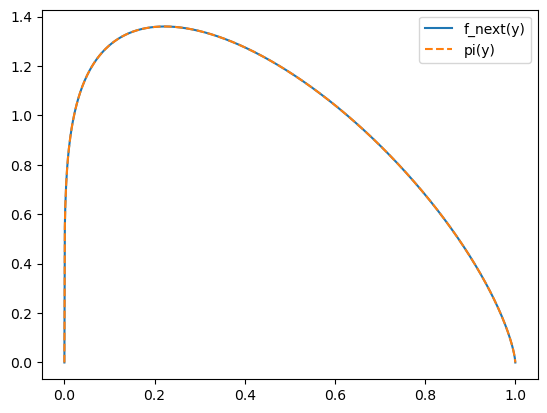

L1 grid error: 5.55537425089847e-10
quad_vec error estimate norm: 3.2664626045043824e-08


In [4]:
# ----------------------------
# Demo: stationarity check
# ----------------------------
Chain = BetaBinomialMarkovChain(x_0=0.5, n=10, alpha=1.2, beta=1.7)

y = np.linspace(0, 1, 1000)
res, err = Chain.NextDistribution_quadvec(y, beta_dist.pdf, Chain.alpha, Chain.beta)

plt.plot(y, res, label="f_next(y)")
plt.plot(y, beta_dist.pdf(y, Chain.alpha, Chain.beta), "--", label="pi(y)")
plt.legend()
plt.show()

print("L1 grid error:", np.sum(np.abs(beta_dist.pdf(y, Chain.alpha, Chain.beta) - res)))
print("quad_vec error estimate norm:", err)
